# HW4: Occupation Dataset

### Introduction:

Special thanks to: https://github.com/guipsamora for sharing his datasets, materials, and questions.

- https://github.com/justmarkham for sharing the dataset and materials.


In [1]:
### Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
### I believe the following data set is from the US in the 1950s.
### Gender proportions and ages are thus reflective of that era.
### Import the dataset from this address. https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
### Assign it to a variable called users and use the 'user_id' as index
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

In [13]:
# Problem 1. See the first 10 entries. (done for you)
users.head(10)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


In [12]:
# Problem 2. How many observations and columns are in the data?
print('Observations: ' + str(len(users)))
print('Columns: ' + str(len(users.columns)))

Observations: 943
Columns: 4


In [13]:
# Problem 3. How many different occupations there are in this dataset?
print(len(pd.unique(users['occupation'])))

21


In [39]:
# Problem 4. What is the most frequent occupation?
users['occupation'].value_counts().index[0]

'student'

In [42]:
# Problem 5. Discover what is the mean age per occupation.
# Sort the results and find the 3 occupations with the lowest mean age and the 3 with the highest
users['age'].groupby(users['occupation']).mean().sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

Occupations with 3 lowest: student, none, entertainment.
Occupations with 3 highest: educator, doctor, retired.

In [46]:
# Problem 6. Find the proportion of males by occupation and sort it from the most to the least
(users['gender'] == 'M').groupby(users['occupation']).mean().sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [49]:
# Problem 7. For each occupation, calculate the minimum and maximum ages
# See groupby and agg() to perform multiple aggregate functions at once
users['age'].groupby(users['occupation']).agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [74]:
# Problem 8. For each combination of occupation and gender, calculate the mean age.
# Arrange the results in a table so each row is an occupation, and you have a 
# column of the average male age and another column with the average female age.
# Sort the resulting table by Female mean age from least to greatest

x = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()
pivot_table = x.pivot(index='occupation', columns='gender', values='age').fillna(0).sort_values('F')
print(pivot_table)

gender                 F          M
occupation                         
doctor          0.000000  43.571429
student        20.750000  22.669118
salesman       27.000000  38.555556
scientist      28.333333  36.321429
engineer       29.500000  36.600000
artist         30.307692  32.333333
entertainment  31.000000  29.000000
programmer     32.166667  33.216667
homemaker      34.166667  23.000000
other          35.472222  34.028986
none           36.500000  18.600000
marketing      37.200000  37.875000
writer         37.631579  35.346154
technician     38.000000  32.961538
educator       39.115385  43.101449
lawyer         39.500000  36.200000
healthcare     39.818182  45.400000
librarian      40.000000  40.000000
administrator  40.638889  37.162791
executive      44.000000  38.172414
retired        70.000000  62.538462


In [72]:
# Problem 9. For each occupation find the count of women and men
# Arrange the results in a table so each row is an occupation, similar to above
count_by_occupation_gender = users.groupby(['occupation', 'gender']).size().reset_index(name='count')
pivot_table = count_by_occupation_gender.pivot_table(index='occupation', columns='gender', values='count', fill_value=0)
print(pivot_table)

gender          F    M
occupation            
administrator  36   43
artist         13   15
doctor          0    7
educator       26   69
engineer        2   65
entertainment   2   16
executive       3   29
healthcare     11    5
homemaker       6    1
lawyer          2   10
librarian      29   22
marketing      10   16
none            4    5
other          36   69
programmer      6   60
retired         1   13
salesman        3    9
scientist       3   28
student        60  136
technician      1   26
writer         19   26


In [77]:
# Problem 10. Turn the counts above into proportions. e.g administrator 0.455696 0.544304
# Arrange results in increasing order of proportion men
count_by_occupation_gender = users.groupby(['occupation', 'gender']).size().reset_index(name='count')
pivot_table = count_by_occupation_gender.pivot_table(index='occupation', columns='gender', values='count', fill_value=0)
proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)
print(proportions)

gender                F         M
occupation                       
administrator  0.455696  0.544304
artist         0.464286  0.535714
doctor         0.000000  1.000000
educator       0.273684  0.726316
engineer       0.029851  0.970149
entertainment  0.111111  0.888889
executive      0.093750  0.906250
healthcare     0.687500  0.312500
homemaker      0.857143  0.142857
lawyer         0.166667  0.833333
librarian      0.568627  0.431373
marketing      0.384615  0.615385
none           0.444444  0.555556
other          0.342857  0.657143
programmer     0.090909  0.909091
retired        0.071429  0.928571
salesman       0.250000  0.750000
scientist      0.096774  0.903226
student        0.306122  0.693878
technician     0.037037  0.962963
writer         0.422222  0.577778


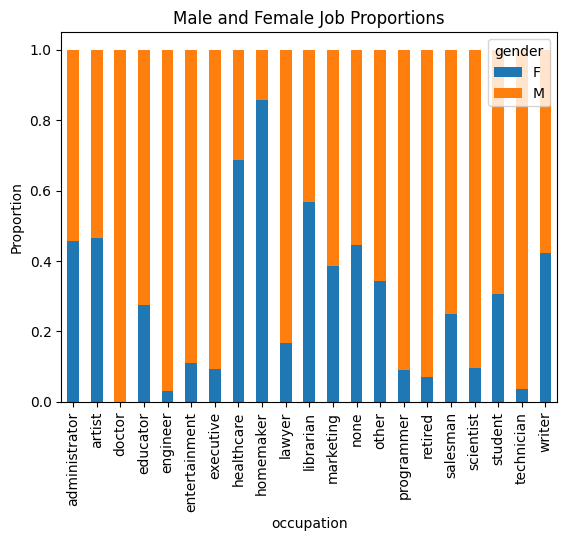

In [81]:
# Create a stacked barchart showing the results above
ax = proportions.plot(kind = 'bar', stacked = True)
ax.set_ylabel('Proportion')
ax.set_title('Male and Female Job Proportions')
plt.show()

In [21]:
# Extract the first digit of each zip code 
# and create a new column called 'region' that maps the
# first digit of the zip to new values using this dictionary:
d = {'0': 'New England',
'1': 'Mid-Atlantic',
'2': 'Central East Coast',
'3': 'The South',
'4': 'Midwest',
'5': 'Northern Great Plains',
'6': 'Central Great Plains',
'7': 'Southern Central',
'8': 'Mountain Desert',
'9': 'West Coast'} 

# print the first 5 rows of the result
# postal codes that begin with a letter are actually Canadian but are missing the last digit. These rows can be ignored.

In [39]:
x = users['zip_code'].copy()
region = []
count = []
for i in range(len(users)):
    x.iloc[i] = x.iloc[i][0]
    if x.iloc[i] in d:
        region.append(d[x.iloc[i]])
    else:
        region.append(None)
users['region'] = region
users.head()

,age,gender,occupation,zip_code,region
user_id,,,,,
1,24,M,technician,85711,Mountain Desert
2,53,F,other,94043,West Coast
3,23,M,writer,32067,The South
4,24,M,technician,43537,Midwest
5,33,F,other,15213,Mid-Atlantic


In [44]:
# for the occuptation 'retired', find the mean age of each region
users[users['occupation'] == 'retired'].pivot_table(index = 'occupation', columns = 'region', values = 'age', aggfunc = 'mean')

region,Central East Coast,Central Great Plains,Mid-Atlantic,Midwest,New England,Northern Great Plains,The South,West Coast
occupation,,,,,,,,
retired,60.0,59.5,60.0,69.0,65.0,61.0,73.0,60.5
